In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

## Read the data 

In [2]:
data = pd.read_csv("./Dry_Bean.csv")

In [3]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
data.shape

(13611, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

## Random Forest 

### Predictors and Target

In [6]:
features = data.columns.to_list()

In [7]:
target = 'Class'

In [8]:
features.remove(target)

In [9]:
X = data[features].values

In [10]:
y = data[target].values

### Split the dataset into train and test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2022)

In [13]:
X_train.shape

(10208, 16)

In [14]:
X_test.shape

(3403, 16)

In [15]:
y_train.shape

(10208,)

In [16]:
y_test.shape

(3403,)

## Build random forest classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf_clf = RandomForestClassifier(n_estimators=50, min_samples_leaf=20)

In [19]:
rf_clf.fit(X_train, y_train)  

RandomForestClassifier(min_samples_leaf=20, n_estimators=50)

### Check the model performance

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
y_pred = rf_clf.predict(X_test)

In [22]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9194828092859242

In [23]:
ac1= accuracy_score(y_true=y_test, y_pred=y_pred)*100

In [24]:
print("Accuracy of testing data:", ac1)

Accuracy of testing data: 91.94828092859242


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.89      0.91       321
      BOMBAY       1.00      0.98      0.99       115
        CALI       0.92      0.95      0.93       413
    DERMASON       0.92      0.93      0.92       906
       HOROZ       0.97      0.94      0.96       472
       SEKER       0.95      0.93      0.94       526
        SIRA       0.85      0.87      0.86       650

    accuracy                           0.92      3403
   macro avg       0.93      0.93      0.93      3403
weighted avg       0.92      0.92      0.92      3403



In [26]:
confusion_matrix(y_test, y_pred)

array([[286,   0,  21,   0,   1,   4,   9],
       [  1, 113,   1,   0,   0,   0,   0],
       [ 16,   0, 391,   0,   3,   0,   3],
       [  0,   0,   0, 840,   1,  13,  52],
       [  3,   0,  10,   3, 446,   0,  10],
       [  5,   0,   0,  10,   0, 488,  23],
       [  0,   0,   3,  63,  10,   9, 565]], dtype=int64)

## AdaBoost Classifier

### Influence vs error rate in AdaBoost Classifier

In [27]:
error_rate = np.arange(0.001, 0.999, 0.001)

In [28]:
influence = 0.5 * np.log((1 - error_rate) / error_rate)

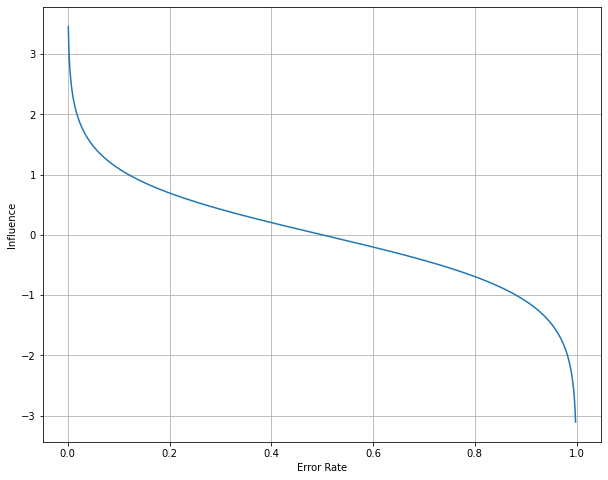

In [29]:
plt.figure(figsize=(10,8))
plt.plot(error_rate, influence)
plt.grid()
plt.xlabel("Error Rate")
plt.ylabel("Influence")
plt.show()

In [30]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
adb_clf = AdaBoostClassifier()

In [32]:
adb_clf.fit(X_train, y_train)

AdaBoostClassifier()

### Check the performance of the model

In [33]:
y_pred = adb_clf.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred)

0.6776373787834263

In [35]:
ac2=accuracy_score(y_test, y_pred)*100

In [36]:
print("Accuracy of testing data:", ac2)

Accuracy of testing data: 67.76373787834264


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       321
      BOMBAY       1.00      0.99      1.00       115
        CALI       0.50      1.00      0.66       413
    DERMASON       0.62      0.99      0.76       906
       HOROZ       0.95      0.73      0.82       472
       SEKER       0.94      0.22      0.35       526
        SIRA       0.80      0.65      0.72       650

    accuracy                           0.68      3403
   macro avg       0.69      0.65      0.62      3403
weighted avg       0.69      0.68      0.62      3403



C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
confusion_matrix(y_test, y_pred)

array([[  0,   0, 283,   1,   0,   1,  36],
       [  0, 114,   1,   0,   0,   0,   0],
       [  0,   0, 411,   0,   0,   0,   2],
       [  0,   0,   0, 901,   0,   0,   5],
       [  0,   0,  98,  21, 343,   0,  10],
       [  0,   0,   0, 358,   0, 114,  54],
       [  0,   0,  33, 169,  19,   6, 423]], dtype=int64)

## eXtreme Gradient Boosting (XGBoost)

In [39]:
import xgboost as xgb

In [40]:
xgb_clf = xgb.XGBClassifier()

In [41]:
y_train_mod = y_train
y_test_mod = y_test

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_mod = le.fit_transform(y_train)

In [43]:
xgb_clf.fit(X_train, y_train_mod)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [44]:
y_pred = xgb_clf.predict(X_test)

In [45]:
y_test_mod=le.fit_transform(y_test)

In [46]:
confusion_matrix(y_test_mod , y_pred)

array([[293,   0,  17,   1,   1,   2,   7],
       [  0, 114,   1,   0,   0,   0,   0],
       [  9,   0, 400,   0,   1,   1,   2],
       [  0,   0,   0, 837,   2,  13,  54],
       [  4,   0,  10,   3, 443,   0,  12],
       [  3,   0,   0,   9,   0, 499,  15],
       [  3,   0,   3,  56,  11,   3, 574]], dtype=int64)

In [47]:
print(classification_report(y_test_mod, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       321
           1       1.00      0.99      1.00       115
           2       0.93      0.97      0.95       413
           3       0.92      0.92      0.92       906
           4       0.97      0.94      0.95       472
           5       0.96      0.95      0.96       526
           6       0.86      0.88      0.87       650

    accuracy                           0.93      3403
   macro avg       0.94      0.94      0.94      3403
weighted avg       0.93      0.93      0.93      3403



In [48]:
accuracy_score(y_true = y_test_mod, y_pred = y_pred)

0.9285924184543051

In [49]:
ac3=accuracy_score(y_test_mod, y_pred)*100

In [50]:
print("Accuracy of test dataset:",ac3)

Accuracy of test dataset: 92.8592418454305


## Performance comparison

In [51]:
import seaborn as sns

In [52]:
accuracy =  {ac1: 'Random forest', ac2: 'Adaboost', ac3: 'XGboost'}

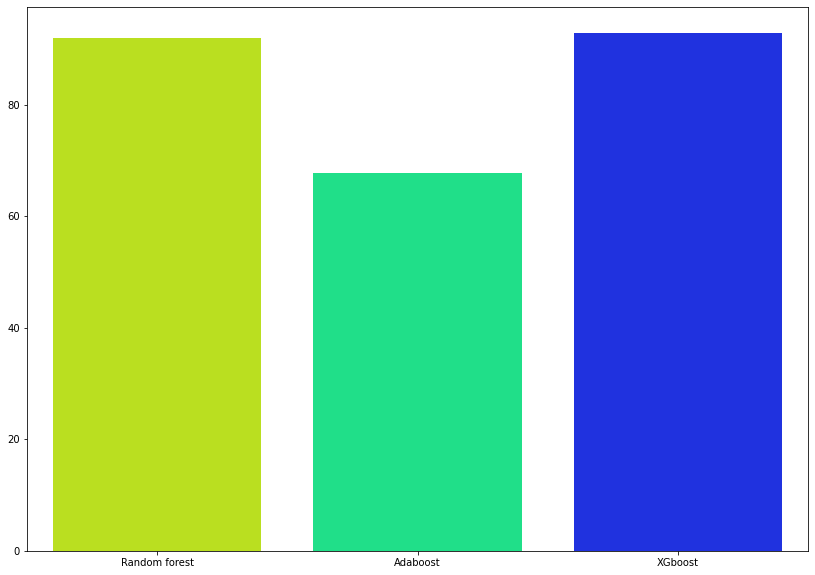

In [53]:
plt.figure(figsize=(14,10))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');

## Conclustion

* XGboost model has the more accuracy as compair to Random forest and Adaboost